In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
data = pd.read_csv("heart.csv")
data.keys()

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [3]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Attribute Information
#### Age: age of the patient [years]
#### Sex: sex of the patient [M: Male, F: Female]
#### ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
#### RestingBP: resting blood pressure [mm Hg]
#### Cholesterol: serum cholesterol [mm/dl]
#### FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
#### RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or     depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
#### MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
#### ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
#### Oldpeak: oldpeak = ST [Numeric value measured in depression]
#### ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
#### HeartDisease: output class [1: heart disease, 0: Normal]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.shape

(918, 12)

In [6]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
data["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [8]:
# applying one hot encoding for object columns so we would get int columns
df = pd.get_dummies(data, drop_first=False, dtype=int)

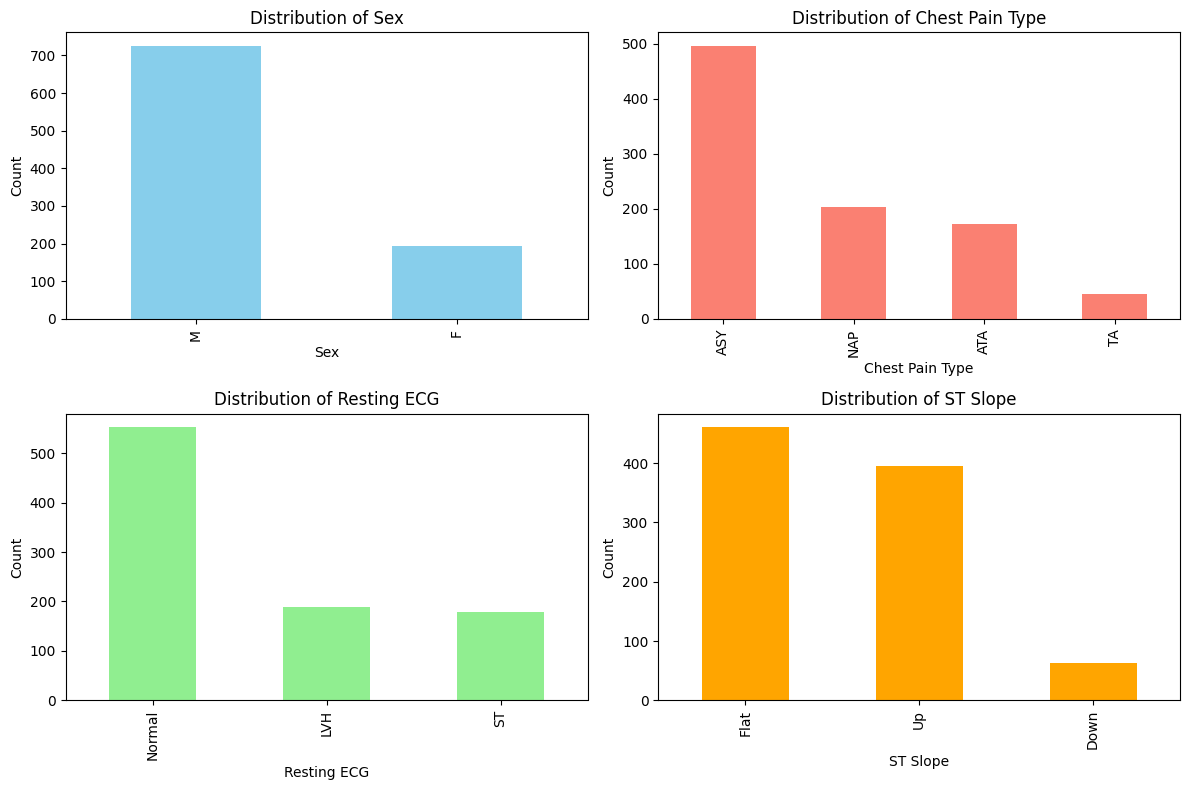

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot value counts for 'Sex'
data['Sex'].value_counts().plot(kind='bar', ax=axes[0][0], color='skyblue')
axes[0][0].set_title('Distribution of Sex')
axes[0][0].set_xlabel('Sex')
axes[0][0].set_ylabel('Count')

# Plot value counts for 'ChestPainType'
data['ChestPainType'].value_counts().plot(kind='bar', ax=axes[0][1], color='salmon')
axes[0][1].set_title('Distribution of Chest Pain Type')
axes[0][1].set_xlabel('Chest Pain Type')
axes[0][1].set_ylabel('Count')

# Plot value counts for 'RestingECG'
data['RestingECG'].value_counts().plot(kind='bar', ax=axes[1][0], color='lightgreen')
axes[1][0].set_title('Distribution of Resting ECG')
axes[1][0].set_xlabel('Resting ECG')
axes[1][0].set_ylabel('Count')

# Plot value counts for 'ST_Slope'
data['ST_Slope'].value_counts().plot(kind='bar', ax=axes[1][1], color='orange')
axes[1][1].set_title('Distribution of ST Slope')
axes[1][1].set_xlabel('ST Slope')
axes[1][1].set_ylabel('Count')

plt.tight_layout()
plt.show()

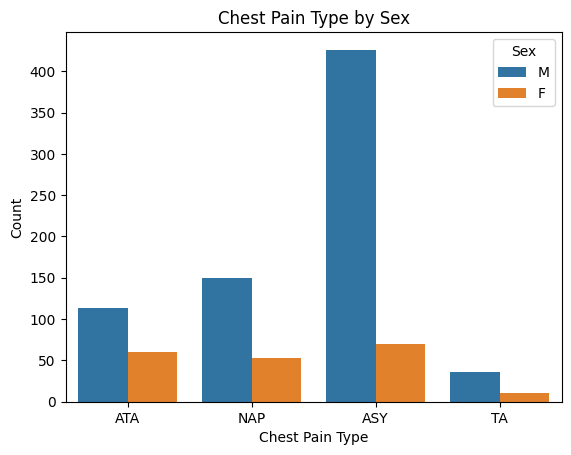

In [10]:
sns.countplot(data=data, x='ChestPainType', hue='Sex')
plt.title('Chest Pain Type by Sex')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

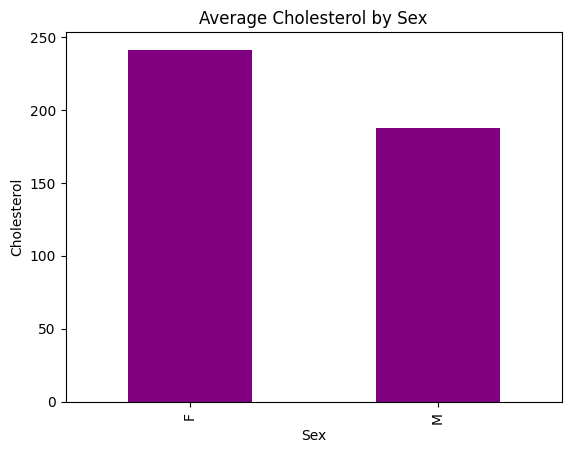

In [11]:
mean_chol = data.groupby('Sex')['Cholesterol'].mean()
mean_chol.plot(kind='bar', color='purple')
plt.title('Average Cholesterol by Sex')
plt.ylabel('Cholesterol')
plt.show()

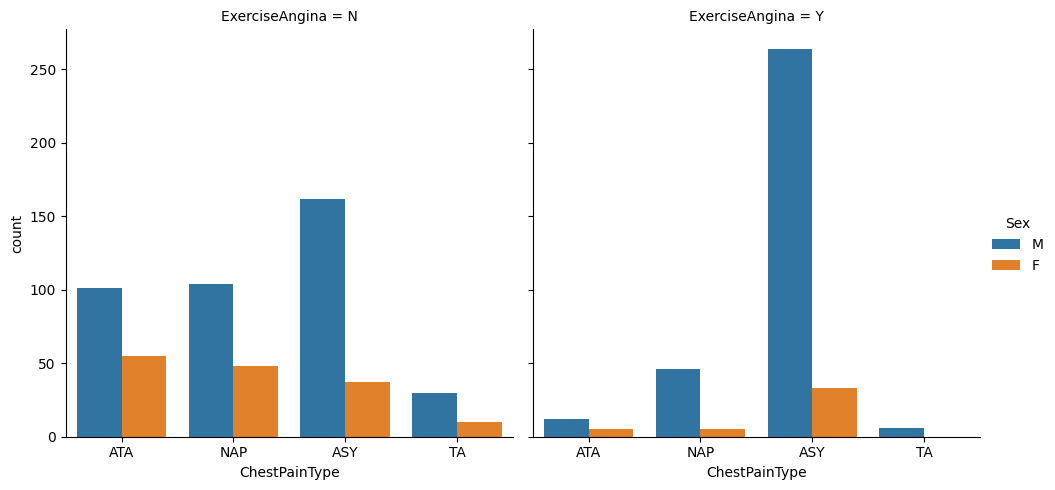

In [12]:
sns.catplot(data=data, x='ChestPainType', hue='Sex', col='ExerciseAngina', kind='count')

### Exercise-induced angina is chest pain that occurs during physical activity due to a lack of blood flow to the heart muscle. It typically feels like a pressure, tightness, or heaviness in the chest and can radiate to the arms, jaw, or neck.

<Axes: xlabel='Age', ylabel='MaxHR'>

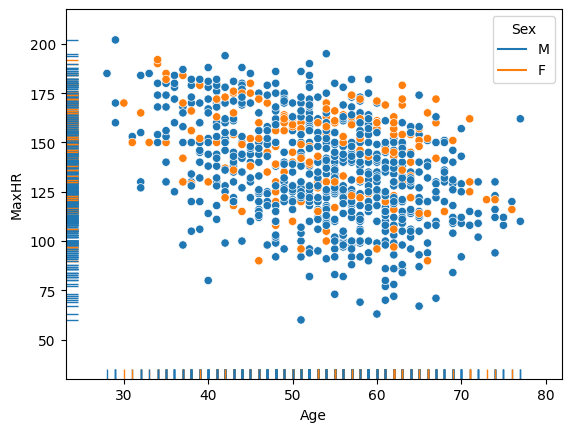

In [13]:
sns.scatterplot(data, x="Age", y="MaxHR", hue="Sex")
sns.rugplot(data, x="Age", y="MaxHR", hue="Sex")

In [14]:
data['Sex'].unique()

array(['M', 'F'], dtype=object)

In [15]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [16]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [17]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [18]:
data['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [19]:
df = data.copy()
df.RestingECG.replace({ 'Normal':1, 'ST':2, 'LVH':3}, inplace = True)
df.ChestPainType.replace( { 'ATA': 1, 'NAP' : 2,  'ASY' : 3, 'TA' : 4}, inplace = True)
df.ST_Slope.replace ( {'Up':1, 'Flat' :2, 'Down' :3}, inplace = True)
df.ExerciseAngina.replace ( {'N':0, 'Y' :1}, inplace = True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,1,172,0,0.0,1,0
1,49,F,2,160,180,0,1,156,0,1.0,2,1
2,37,M,1,130,283,0,2,98,0,0.0,1,0
3,48,F,3,138,214,0,1,108,1,1.5,2,1
4,54,M,2,150,195,0,1,122,0,0.0,1,0


In [20]:
#applying one hot encoding for object colunns
df = pd.get_dummies(df, drop_first = True, dtype=int)
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,1,140,289,0,1,172,0,0.0,1,0,1
1,49,2,160,180,0,1,156,0,1.0,2,1,0
2,37,1,130,283,0,2,98,0,0.0,1,0,1
3,48,3,138,214,0,1,108,1,1.5,2,1,0
4,54,2,150,195,0,1,122,0,0.0,1,0,1


In [21]:
df.shape

(918, 12)

In [22]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.4331398 , -1.70557305,  0.41090889, ..., -0.83243239,
        -1.05211381,  0.51595242],
       [-0.47848359, -0.53099236,  1.49175234, ...,  0.10566353,
         0.59607813, -1.93816322],
       [-1.75135854, -1.70557305, -0.12951283, ..., -0.83243239,
        -1.05211381,  0.51595242],
       ...,
       [ 0.37009972,  0.64358833, -0.12951283, ...,  0.29328271,
         0.59607813,  0.51595242],
       [ 0.37009972, -1.70557305, -0.12951283, ..., -0.83243239,
         0.59607813, -1.93816322],
       [-1.64528563, -0.53099236,  0.30282455, ..., -0.83243239,
        -1.05211381,  0.51595242]])

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=21)

In [25]:
print(X_train.shape)
print(X_test.shape)

(734, 11)
(184, 11)


In [26]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.8641304347826086

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.842391304347826

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
X_pca.shape

(918, 5)

In [29]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=21)

In [30]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_pca, y_train)
model_rf.score(X_test_pca, y_test)

0.7880434782608695

In [31]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train_pca)
model.score(X_test_pca, y_test_pca)

0.7717391304347826

In [32]:
pca.explained_variance_ratio_

array([9.20214112e-01, 4.91308534e-02, 2.50818076e-02, 5.33336288e-03,
       9.82641352e-05])

# In this https://github.com/SMARIFUL1/Machine-Learning-Projects/blob/main/PCA.ipynb I have used percentage but here I have fixed the number of components. So it depends on situation what we have to use.